<a href="https://colab.research.google.com/github/eduardocarbo/gh-react/blob/main/Modulo_7_Modelos_de_reducci%C3%B3n_de_dimensiones_ACP_EAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Modelos de reducci√≥n de dimensiones ACP

##<font color='blue'>Introducci√≥n</font>

*   Cuando se tiene un dataset de alta dimensi√≥n (cantidad de columnas >10), lo que primero se suele realizar es una exploraci√≥n visual de los datos. 
*   Sin embargo, cuando hay demasiadas dimensiones los enfoques cl√°sicos se quedan cortos
*   Existen t√©cnicas de visualizaci√≥n dise√±adas espec√≠ficamente para los datos de alta dimensi√≥n, que se presentar√°n en este modulo. 
*   A veces muchas caracter√≠sticas contienen poca informaci√≥n porque no muestran ninguna varianza o porque son duplicados de otras caracter√≠sticas. 
*   Vamos a detectar estas caracter√≠sticas y a eliminarlas del conjunto de datos para poder centrarnos en las m√°s relevantes.  
*  Este proceso de eliminar caracter√≠sticas irrelevantes, para reducir la dimensionalidad se hace mediante el c√°lculo de componentes principales no correlacionados.


###Algo m√°s sobre el m√©todo .describe()

Pueden obtenerse estad√≠sticas de resumen para datos no num√©ricos usando el argumento ```exclude='number'```



**Ejercicio 1:** Cargue el archivo pokemon.xlsx y importe las librer√≠as pandas 
con el alias pd y explore la data.



*   ¬øCu√°ntas caracter√≠sticas (variables) tiene el dataset?




In [2]:
from google.colab import files
uploaded = files.upload()

Saving pokemon_df.xlsx to pokemon_df.xlsx


In [3]:
import pandas as pd
df = pd.read_excel("pokemon_df.xlsx")

import numpy as np

In [4]:
df.describe()

Unnamed: 0         HP     Attack     Defense  Generation
count  160.000000  160.00000  160.00000  160.000000       160.0
mean    79.500000   64.61250   74.98125   70.175000         1.0
std     46.332134   27.92127   29.18009   28.883533         0.0
min      0.000000   10.00000    5.00000    5.000000         1.0
25%     39.750000   45.00000   52.00000   50.000000         1.0
50%     79.500000   60.00000   71.00000   65.000000         1.0
75%    119.250000   80.00000   95.00000   85.000000         1.0
max    159.000000  250.00000  155.00000  180.000000         1.0

In [5]:
columnas_numericas=["HP","Attack","Defense"]#se borra generation proque no aporta nada . su variacion estandar es 0
df.describe()

Unnamed: 0         HP     Attack     Defense  Generation
count  160.000000  160.00000  160.00000  160.000000       160.0
mean    79.500000   64.61250   74.98125   70.175000         1.0
std     46.332134   27.92127   29.18009   28.883533         0.0
min      0.000000   10.00000    5.00000    5.000000         1.0
25%     39.750000   45.00000   52.00000   50.000000         1.0
50%     79.500000   60.00000   71.00000   65.000000         1.0
75%    119.250000   80.00000   95.00000   85.000000         1.0
max    159.000000  250.00000  155.00000  180.000000         1.0

**Ejercicio 2:** Nombre la lista columnas_numericas con las caracer√≠sticas: 'HP', 'Attack', 'Defense', 'HP', 'Attack', 'Generation' y utilice el m√©todo .describe() para encontrar la caracter√≠stica num√©rica sin varianza y eliminar su nombre de la lista asignada a numero_columnas


**Ejercicio 3:** Nombre la lista no_columnas_numericas que contenga las caracter√≠sticas no n√∫mericas de pokemon_df. Combine las dos listas con los nombres de caracter√≠sticas para sub-seleccionar las caracter√≠sticas elegidas de df. Para eso llame al nuevo dataframe como df_seleccion e imprima las primeras lineas del mismo 

In [6]:
df.head()

Unnamed: 0  HP  Attack  Defense  Generation                   Name   Type  \
0           0  45      49       49           1              Bulbasaur  Grass   
1           1  60      62       63           1                Ivysaur  Grass   
2           2  80      82       83           1               Venusaur  Grass   
3           3  80     100      123           1  VenusaurMega Venusaur  Grass   
4           4  39      52       43           1             Charmander   Fire   

   Legendary  
0      False  
1      False  
2      False  
3      False  
4      False

In [7]:
#Bautizar nueva lista:
no_columnas_numericas = ["Name","Type","Legendary"]

In [8]:
#llamar el nuevo dataframe 
df_seleccion = df[columnas_numericas+no_columnas_numericas]

In [9]:
df_seleccion.head()

HP  Attack  Defense                   Name   Type  Legendary
0  45      49       49              Bulbasaur  Grass      False
1  60      62       63                Ivysaur  Grass      False
2  80      82       83               Venusaur  Grass      False
3  80     100      123  VenusaurMega Venusaur  Grass      False
4  39      52       43             Charmander   Fire      False

**Ejercicio 4:** Encuentre la caracter√≠stica no num√©rica sin variaci√≥n y elimine su nombre de la lista asignada a no_columnas_numericas

In [10]:
df_seleccion.describe(exclude='number')

Name   Type Legendary
count         160    160       160
unique        160     15         1
top     Bulbasaur  Water     False
freq            1     31       160

In [11]:
no_columnas_numericas=["Name","Type"]

##<font color='blue'>Selecci√≥n de caracter√≠sticas VS Extracci√≥n de caracter√≠sticas </font>

* Reducir la cantidad de dimensiones en su conjunto de datos tiene m√∫ltiples beneficios (el dataset se vuelve m√°s simple, es m√°s f√°cil manipularlo, menos espacio en disco, c√°lculos m√°s r√°pidos, menos probabilidad de overfitting en el modelo)

* La forma m√°s sencilla de reducir la dimensionalidad es seleccionar solo las caracter√≠sticas o columnas que son importantes para usted de un conjunto de datos  grande (dif√≠cil decidir qu√© caracter√≠sticas son importantes).

  * 
Recuerde el m√©todo pandas DataFrame ```.drop()```, puede eliminar una caracter√≠stica f√°cilmente. Aseg√∫rese de pasar el argumento ```Axis=1```, para especificar que estamos soltando una columna en lugar de una fila.


* Pairplot() de Seaborn es excelente para explorar visualmente conjuntos de datos de tama√±o peque√±o a mediano. Proporciona una comparaci√≥n uno por uno de cada caracter√≠stica num√©rica en el conjunto de datos en forma de diagrama de dispersi√≥n m√°s, en la diagonal, una vista de la distribuci√≥n de cada caracter√≠stica.

* **Selecci√≥n de caracter√≠sticas:** 
Se elimina por completo una caracter√≠stica y la informaci√≥n que contiene del conjunto de dato. Se debe procurar minimizar la p√©rdida de informaci√≥n, eliminando √∫nicamente las caracter√≠sticas que son irrelevantes o contienen poca informaci√≥n √∫nica (aunque algunas veces no se pueda)

* **Extracci√≥n de caracter√≠sticas:** 
En lugar de seleccionar un subconjunto de caracter√≠sticas de nuestro conjunto de datos inicial, calculamos o extraemos nuevas caracter√≠sticas de las originales. Las nuevas caracter√≠sticas tienen la menor cantidad posible de informaci√≥n redundante y, son menos numerosas. 
   * **Desventaja:** las nuevas caracter√≠sticas no son tan f√°ciles de entender que las originales.

* La dimensionalidad de los conjuntos de datos con muchas correlaciones fuertes entre las diferentes caracter√≠sticas, se puede reducir mucho con la extracci√≥n de caracter√≠sticas

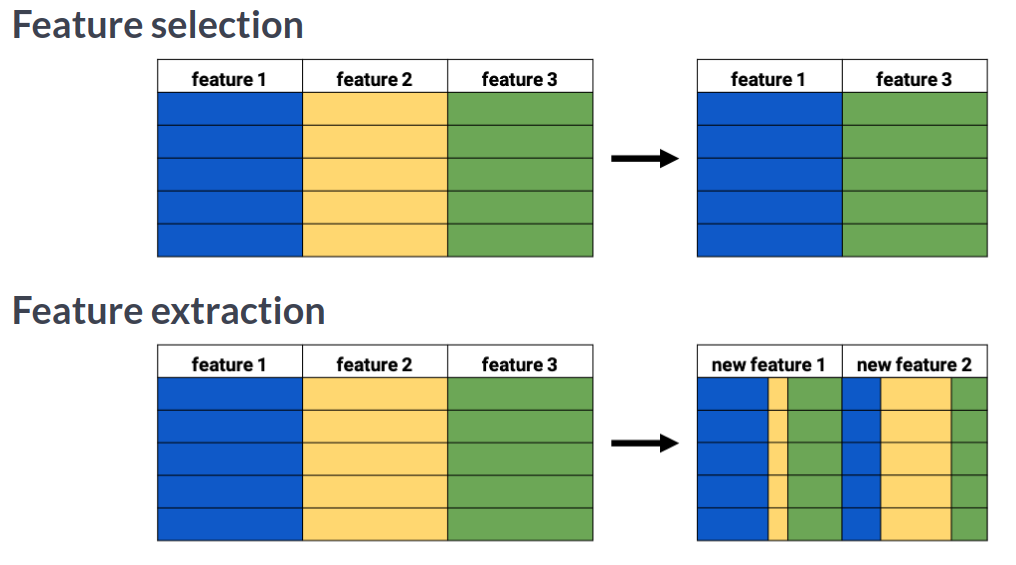


## Detecci√≥n visual de caracter√≠sticas redundantes

Utilicemos Seaborn para explorar algunas muestras del conjunto de datos de mediciones corporales ANSUR del ej√©rcito estadounidense.

**Ejercicio 1:** Cargue los archivos ansur_df_1.xlsx y ansur_df_2.xlsx e importe las librer√≠as pandas con el alias pd, matplotlib.pyplot con el alias plt y seaborn con el alias sns y explore la data.

In [12]:
from google.colab import files
uploaded = files.upload()

Saving ansur_df_2.xlsx to ansur_df_2.xlsx
Saving ansur_df_1.xlsx to ansur_df_1.xlsx


In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df_1 = pd.read_excel("ansur_df_1.xlsx")
df_2 = pd.read_excel("ansur_df_2.xlsx")

In [15]:
df_1.describe()

weight_kg    stature_m  body_height
count  200.000000   200.000000   200.000000
mean    77.165000  1693.730000    66.682200
std     14.753212    89.873094     3.538176
min     47.100000  1446.000000    56.930000
25%     67.500000  1630.000000    64.170000
50%     74.300000  1684.500000    66.320000
75%     86.625000  1754.000000    69.060000
max    140.000000  1959.000000    77.130000

In [16]:
df_1.head(5)

Gender  weight_kg  stature_m  body_height
0   Male       81.5       1776        69.92
1   Male       72.6       1702        67.01
2   Male       92.9       1735        68.31
3   Male       79.4       1655        65.16
4   Male       94.6       1914        75.35

In [17]:
df_2.describe()

footlength  headlength  n_legs
count  200.000000  200.000000   200.0
mean   258.275000  194.385000     2.0
std     16.843035    8.795658     0.0
min    215.000000  176.000000     2.0
25%    247.000000  188.000000     2.0
50%    257.000000  194.000000     2.0
75%    269.000000  200.250000     2.0
max    305.000000  218.000000     2.0

In [18]:
df_2.head(5)

Gender  footlength  headlength  n_legs
0   Male         273         206       2
1   Male         263         201       2
2   Male         270         202       2
3   Male         267         199       2
4   Male         305         197       2

**Ejercicio 2:** Cree un diagrama de pares o de parejas de la muestra de datos ansur_df_1 y coloree los puntos utilizando la caracter√≠stica "Gender".
Use la expresi√≥n ```sns.pairplot(df, hue="Gender", diag_kind='hist')```

**Nota:** El diagrama de pares permite ver r√°pidamente la relaci√≥n cruzada entre todas las variables de un conjunto de datos(), en forma de diagrama de puntos. Las gr√°ficas de la diagonal son la distribuci√≥n de los datos de dicha variable. 


* Seg√∫n el gr√°fico, ¬øqu√© variables presentan "casi" una perfecta correlaci√≥n?

<font color='blue'>Puede verificar dicha correlaci√≥n usando el m√©todo .corr()</font>

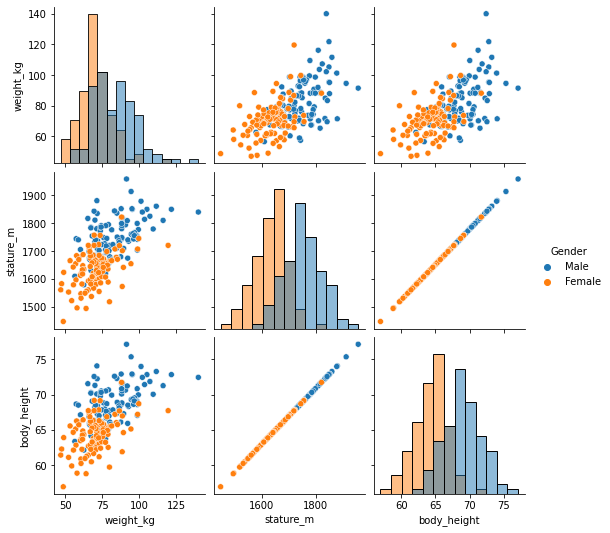

In [21]:
sns.pairplot(df_1, hue="Gender", diag_kind='hist')

In [22]:
df_1[["stature_m","body_height"]].corr()

stature_m  body_height
stature_m          1.0          1.0
body_height        1.0          1.0

**Ejercicio 3:** Dos caracter√≠sticas son b√°sicamente duplicadas, elimine una de ellas del conjunto de datos.

In [23]:
df_1_reducido=df_1.drop("stature_m",axis=1)

In [24]:
df_1_reducido

Gender  weight_kg  body_height
0      Male       81.5        69.92
1      Male       72.6        67.01
2      Male       92.9        68.31
3      Male       79.4        65.16
4      Male       94.6        75.35
..      ...        ...          ...
195  Female       58.1        58.86
196  Female       64.2        58.78
197  Female       75.8        64.61
198  Female       68.3        63.27
199  Female       47.1        61.42

[200 rows x 3 columns]

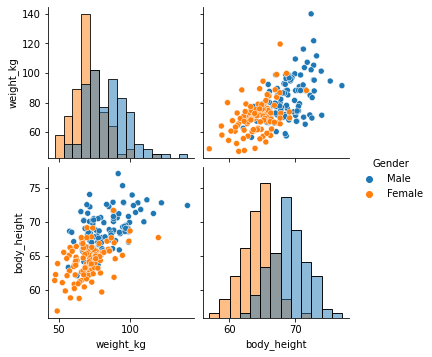

In [25]:
sns.pairplot(df_1_reducido, hue="Gender", diag_kind='hist')

In [26]:
df_1_reducido.head(5)

Gender  weight_kg  body_height
0   Male       81.5        69.92
1   Male       72.6        67.01
2   Male       92.9        68.31
3   Male       79.4        65.16
4   Male       94.6        75.35

In [27]:
df_1_generom=df_1_reducido[df_1_reducido["Gender"]=="Male"]


In [28]:
df_1_reducido.head(5)

Gender  weight_kg  body_height
0   Male       81.5        69.92
1   Male       72.6        67.01
2   Male       92.9        68.31
3   Male       79.4        65.16
4   Male       94.6        75.35

In [29]:
df_1_generom.describe()

weight_kg  body_height
count  100.000000   100.000000
mean    83.858000    69.055900
std     14.573777     2.769261
min     56.600000    62.130000
25%     72.700000    67.120000
50%     81.900000    68.860000
75%     93.325000    70.830000
max    140.000000    77.130000

**Ejercicio 4:** Cree un diagrama de parejas o de pares de la muestra de datos ansur_df_2 y coloree los puntos usando la caracter√≠stica 'Gender' 

**Ejercicio 5:** Una caracter√≠stica no tiene varianza, elim√≠nela del conjunto de datos.



## Visualizaci√≥n t-SNE de datos de alta dimensi√≥n 

* Vamos a aplicar la t-Distributed Stochastic Neighbor Embedding o t-SNE. Es una t√©cnica para visualizar datos de alta dimensi√≥n mediante la extracci√≥n de caracter√≠sticas. *No funciona con datos no num√©ricos*

**Definici√≥n t-SNE (T-distributed Stochastic Neighbor Embedding):** es un algoritmo de aprendizaje autom√°tico para la visualizaci√≥n de datos. Los gr√°ficos t-SNE modelan cada objeto de alta dimensionalidad por un punto de 2 o 3 dimensiones de manera que los objetos similares se modelan por puntos cercanos y los objetos dispares se modelan por puntos distantes con alta probabilidad.

**En castellano üòÖ‚Äã:**t-SNE maximizar√° la distancia en el espacio bidimensional entre las observaciones que son m√°s diferentes en un espacio de alta dimensi√≥n. Debido a esto, las observaciones que son similares estar√°n cerca unas de otras y pueden agruparse




**Ejercicio 1:** Cargue los archivos ANSUR_II_FEMALE.csv y ANSUR_II_MALE.csv

In [30]:
from google.colab import files
uploaded = files.upload()

Saving ANSUR_II_MALE.csv to ANSUR_II_MALE.csv
Saving ANSUR_II_FEMALE.csv to ANSUR_II_FEMALE.csv


Branch     Component  Gender  \
0          Combat Support  Regular Army  Female   
1  Combat Service Support  Regular Army  Female   
2  Combat Service Support  Regular Army  Female   
3  Combat Service Support  Regular Army  Female   
4             Combat Arms  Regular Army  Female   

   abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
0                             231            1282                    301   
1                             194            1379                    320   
2                             183            1369                    329   
3                             261            1356                    306   
4                             309            1303                    308   

   anklecircumference  axillaheight  balloffootcircumference  \
0                 204          1180                      222   
1                 207          1292                      225   
2                 233          1271                      237   
3                 214          1250                      240   
4                 214          1210                      217   

   balloffootlength  ...  waistdepth  waistfrontlengthsitting  \
0               177  ...         217                      345   
1               178  ...         168                      329   
2               196  ...         159                      367   
3               188  ...         235                      371   
4               182  ...         300                      380   

   waistheightomphalion  wristcircumference  wristheight  weight_kg  \
0                   942                 152          756       65.7   
1                  1032                 155          815       53.4   
2                  1035                 162          799       66.3   
3                   999                 173          818       78.2   
4                   911                 152          762       88.6   

   stature_m        BMI   BMI_class  Height_class  
0      1.560  26.997041  Overweight        Normal  
1      1.665  19.262506      Normal        Normal  
2      1.711  22.647148      Normal          Tall  
3      1.660  28.378575  Overweight        Normal  
4      1.572  35.853259  Overweight        Normal  

[5 rows x 99 columns]

**Ejercicio 2:** Nombre los dataframe como ansur_male, y ansur_female respectivamente. Imprima un encabezado de los mismos

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
ansur_female = pd.read_csv("ANSUR_II_FEMALE.csv")
ansur_male= pd.read_csv("ANSUR_II_MALE.csv")

In [62]:
ansur_male.head(5)

Branch     Component Gender  \
0             Combat Arms  Regular Army   Male   
1          Combat Support  Regular Army   Male   
2          Combat Support  Regular Army   Male   
3  Combat Service Support  Regular Army   Male   
4  Combat Service Support  Regular Army   Male   

   abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
0                             266            1467                    337   
1                             233            1395                    326   
2                             287            1430                    341   
3                             234            1347                    310   
4                             250            1585                    372   

   anklecircumference  axillaheight  balloffootcircumference  \
0                 222          1347                      253   
1                 220          1293                      245   
2                 230          1327                      256   
3                 230          1239                      262   
4                 247          1478                      267   

   balloffootlength  ...  waistdepth  waistfrontlengthsitting  \
0               202  ...         240                      440   
1               193  ...         225                      371   
2               196  ...         255                      411   
3               199  ...         205                      399   
4               224  ...         214                      379   

   waistheightomphalion  wristcircumference  wristheight  weight_kg  \
0                  1054                 175          853       81.5   
1                  1054                 167          815       72.6   
2                  1041                 180          831       92.9   
3                   968                 176          793       79.4   
4                  1245                 188          954       94.6   

   stature_m        BMI   BMI_class  Height_class  
0      1.776  25.838761  Overweight          Tall  
1      1.702  25.062103  Overweight        Normal  
2      1.735  30.861480  Overweight        Normal  
3      1.655  28.988417  Overweight        Normal  
4      1.914  25.823034  Overweight          Tall  

[5 rows x 99 columns]

In [63]:
ansur_female.head(5)

Branch     Component  Gender  \
0          Combat Support  Regular Army  Female   
1  Combat Service Support  Regular Army  Female   
2  Combat Service Support  Regular Army  Female   
3  Combat Service Support  Regular Army  Female   
4             Combat Arms  Regular Army  Female   

   abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
0                             231            1282                    301   
1                             194            1379                    320   
2                             183            1369                    329   
3                             261            1356                    306   
4                             309            1303                    308   

   anklecircumference  axillaheight  balloffootcircumference  \
0                 204          1180                      222   
1                 207          1292                      225   
2                 233          1271                      237   
3                 214          1250                      240   
4                 214          1210                      217   

   balloffootlength  ...  waistdepth  waistfrontlengthsitting  \
0               177  ...         217                      345   
1               178  ...         168                      329   
2               196  ...         159                      367   
3               188  ...         235                      371   
4               182  ...         300                      380   

   waistheightomphalion  wristcircumference  wristheight  weight_kg  \
0                   942                 152          756       65.7   
1                  1032                 155          815       53.4   
2                  1035                 162          799       66.3   
3                   999                 173          818       78.2   
4                   911                 152          762       88.6   

   stature_m        BMI   BMI_class  Height_class  
0      1.560  26.997041  Overweight        Normal  
1      1.665  19.262506      Normal        Normal  
2      1.711  22.647148      Normal          Tall  
3      1.660  28.378575  Overweight        Normal  
4      1.572  35.853259  Overweight        Normal  

[5 rows x 99 columns]

In [64]:
ansur_female.tail(5)

Branch            Component  Gender  \
1981  Combat Support  Army National Guard  Female   
1982  Combat Support  Army National Guard  Female   
1983  Combat Support  Army National Guard  Female   
1984  Combat Support  Army National Guard  Female   
1985  Combat Support  Army National Guard  Female   

      abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
1981                             285            1392                    335   
1982                             262            1324                    301   
1983                             260            1334                    318   
1984                             205            1293                    302   
1985                             238            1346                    308   

      anklecircumference  axillaheight  balloffootcircumference  \
1981                 223          1297                      252   
1982                 202          1204                      236   
1983                 213          1259                      234   
1984                 199          1207                      213   
1985                 210          1256                      236   

      balloffootlength  ...  waistdepth  waistfrontlengthsitting  \
1981               196  ...         265                      370   
1982               181  ...         243                      374   
1983               183  ...         254                      351   
1984               163  ...         208                      335   
1985               188  ...         223                      394   

      waistheightomphalion  wristcircumference  wristheight  weight_kg  \
1981                  1002                 162          836       83.2   
1982                   958                 157          804       71.7   
1983                   970                 159          774       76.2   
1984                   952                 146          769       63.2   
1985                   943                 154          797       61.0   

      stature_m        BMI   BMI_class  Height_class  
1981      1.687  29.234331  Overweight        Normal  
1982      1.613  27.558173  Overweight        Normal  
1983      1.644  28.193653  Overweight        Normal  
1984      1.616  24.201059      Normal        Normal  
1985      1.641  22.652319      Normal        Normal  

[5 rows x 99 columns]

**Ejercicio 3:**

* Cree un nuevo dataframe llamado df conjuntamente con los datos de datos ANSUR masculino y femenino 

> ***Nota:*** df = pd.concat([ansur_male, ansur_female])

* Elimine las columnas no num√©ricas del conjunto de datos. Para eso nombre una lista como no_numericas

* Nombre a df_numericas eliminando de df a las caracter√≠sticas de no_numericas. ¬øCu√°ntas variables tiene el dataframe df_numericas? 

* Cree un modelo TSNE con una tasa de aprendizaje de 50. Nombre el modelo con la letra m

> ***Nota:*** t-SNE probar√° diferentes configuraciones y las evaluar√°. Las altas tasas de aprendizaje har√°n que el algoritmo sea m√°s aventurero en las configuraciones que prueba, mientras que las bajas tasas de aprendizaje har√°n que sea conservador. Por lo general, las tasas de aprendizaje se encuentran en el rango de 10 a 1000


* Ajuste y transforme el modelo en el conjunto de datos num√©ricos.

> ***Nota:*** Use 

```
tsne_features = m.fit_transform(df_numericas)
```

* Imprima el tama√±o de tsne_variables. ¬øCu√°ntas caracter√≠sticas tiene ahora el modelo?

In [34]:
 df = pd.concat([ansur_male, ansur_female])

In [35]:
df.head(5)

Branch     Component Gender  \
0             Combat Arms  Regular Army   Male   
1          Combat Support  Regular Army   Male   
2          Combat Support  Regular Army   Male   
3  Combat Service Support  Regular Army   Male   
4  Combat Service Support  Regular Army   Male   

   abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
0                             266            1467                    337   
1                             233            1395                    326   
2                             287            1430                    341   
3                             234            1347                    310   
4                             250            1585                    372   

   anklecircumference  axillaheight  balloffootcircumference  \
0                 222          1347                      253   
1                 220          1293                      245   
2                 230          1327                      256   
3                 230          1239                      262   
4                 247          1478                      267   

   balloffootlength  ...  waistdepth  waistfrontlengthsitting  \
0               202  ...         240                      440   
1               193  ...         225                      371   
2               196  ...         255                      411   
3               199  ...         205                      399   
4               224  ...         214                      379   

   waistheightomphalion  wristcircumference  wristheight  weight_kg  \
0                  1054                 175          853       81.5   
1                  1054                 167          815       72.6   
2                  1041                 180          831       92.9   
3                   968                 176          793       79.4   
4                  1245                 188          954       94.6   

   stature_m        BMI   BMI_class  Height_class  
0      1.776  25.838761  Overweight          Tall  
1      1.702  25.062103  Overweight        Normal  
2      1.735  30.861480  Overweight        Normal  
3      1.655  28.988417  Overweight        Normal  
4      1.914  25.823034  Overweight          Tall  

[5 rows x 99 columns]

In [36]:
df.tail(5)

Branch            Component  Gender  \
1981  Combat Support  Army National Guard  Female   
1982  Combat Support  Army National Guard  Female   
1983  Combat Support  Army National Guard  Female   
1984  Combat Support  Army National Guard  Female   
1985  Combat Support  Army National Guard  Female   

      abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
1981                             285            1392                    335   
1982                             262            1324                    301   
1983                             260            1334                    318   
1984                             205            1293                    302   
1985                             238            1346                    308   

      anklecircumference  axillaheight  balloffootcircumference  \
1981                 223          1297                      252   
1982                 202          1204                      236   
1983                 213          1259                      234   
1984                 199          1207                      213   
1985                 210          1256                      236   

      balloffootlength  ...  waistdepth  waistfrontlengthsitting  \
1981               196  ...         265                      370   
1982               181  ...         243                      374   
1983               183  ...         254                      351   
1984               163  ...         208                      335   
1985               188  ...         223                      394   

      waistheightomphalion  wristcircumference  wristheight  weight_kg  \
1981                  1002                 162          836       83.2   
1982                   958                 157          804       71.7   
1983                   970                 159          774       76.2   
1984                   952                 146          769       63.2   
1985                   943                 154          797       61.0   

      stature_m        BMI   BMI_class  Height_class  
1981      1.687  29.234331  Overweight        Normal  
1982      1.613  27.558173  Overweight        Normal  
1983      1.644  28.193653  Overweight        Normal  
1984      1.616  24.201059      Normal        Normal  
1985      1.641  22.652319      Normal        Normal  

[5 rows x 99 columns]

In [37]:
no_numericas = ["Branch","Component","Gender","BMI_class","Height_class"]

In [38]:
df_numericas = df.drop(no_numericas,axis=1)

In [39]:
df_numericas.head(5)

abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
0                             266            1467                    337   
1                             233            1395                    326   
2                             287            1430                    341   
3                             234            1347                    310   
4                             250            1585                    372   

   anklecircumference  axillaheight  balloffootcircumference  \
0                 222          1347                      253   
1                 220          1293                      245   
2                 230          1327                      256   
3                 230          1239                      262   
4                 247          1478                      267   

   balloffootlength  biacromialbreadth  bicepscircumferenceflexed  \
0               202                401                        369   
1               193                394                        338   
2               196                427                        408   
3               199                401                        359   
4               224                435                        356   

   bicristalbreadth  ...  waistbreadth  waistcircumference  waistdepth  \
0               274  ...           329                 933         240   
1               257  ...           316                 870         225   
2               261  ...           329                 964         255   
3               262  ...           315                 857         205   
4               263  ...           303                 868         214   

   waistfrontlengthsitting  waistheightomphalion  wristcircumference  \
0                      440                  1054                 175   
1                      371                  1054                 167   
2                      411                  1041                 180   
3                      399                   968                 176   
4                      379                  1245                 188   

   wristheight  weight_kg  stature_m        BMI  
0          853       81.5      1.776  25.838761  
1          815       72.6      1.702  25.062103  
2          831       92.9      1.735  30.861480  
3          793       79.4      1.655  28.988417  
4          954       94.6      1.914  25.823034  

[5 rows x 94 columns]

In [40]:
#TSNE
from sklearn.manifold import TSNE
m =TSNE(learning_rate=50)
tsne_features = m.fit_transform(df_numericas)#Ajustar el modelo t-SNe en el conjunto de datos num√©rico.
print(tsne_features.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


(6068, 2)


In [65]:
tsne_features.shape

(6068, 2)

**Ejercicio 4:** Cree 3 gr√°ficos de dispersi√≥n de las 2 caracter√≠sticas t-SNE ('x' e 'y') que se a√±adieron al conjunto de datos df. En cada gr√°fico de dispersi√≥n, coloree los puntos seg√∫n una variable categ√≥rica diferente. Para eso:

* Utilice 

```
sns.scatterplot
```

 de seaborn para crear el gr√°fico.
* Colorea los puntos por 'Componente'.

In [71]:
type(tsne_features)

numpy.ndarray

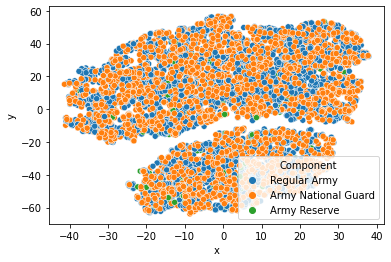

In [70]:
df['x']=tsne_features[:,0]
df['y']=tsne_features[:,1]
sns.scatterplot(x = 'x', y = 'y', hue = "Component", data = df)

* Colorea los puntos del gr√°fico de dispersi√≥n por 'Branch' 

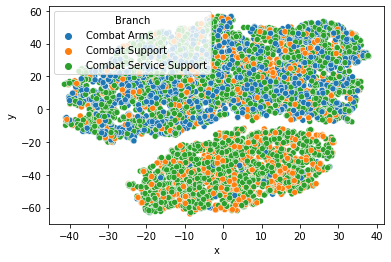

In [72]:
df['x']=tsne_features[:,0]
df['y']=tsne_features[:,1]
sns.scatterplot(x = 'x', y = 'y', hue = "Branch", data = df)

* Colorea los puntos del gr√°fico de dispersi√≥n por 'Gender' 

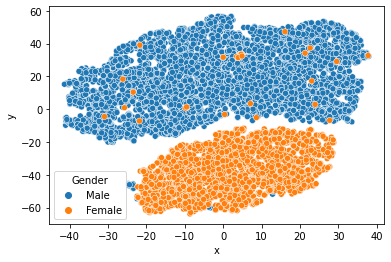

In [73]:
df['x']=tsne_features[:,0]
df['y']=tsne_features[:,1]
sns.scatterplot(x = 'x', y = 'y', hue = "Gender", data = df)